# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# Цель исследования

<h5>Цель исследования</h5>
Определить рыночную стоимость объектов недвижимости, установив параметры, влияющие на цену объектов.
Построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.

<h5>Входные данные</h5>
Данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
(real_estate_data.csv)

1. Пользовательские данные:
   - Количество фотографий
   - Цена недвижимости.
   - Общая площадь.
   - Первый день публикации объявления.
   - Количество комнат.
   - Высота потолков
   - Общее количество этажей в доме.
   - Жилая площадь. 
   - Этаж.
   - Является ли апартаментами.
   - Студия
   - Свободная планировка
   - Площадь кухни.
   - Наличие балкона.
   - Название населенного пункта.
   

3. Автоматически полученные данные:
   - Расстояние до ближайшего аэропорта.
   - Расстояние до центра города.
   - Количество парков в радиусе 3000 метров.
   - Расстояние до ближайшего парка.
   - Количество водоемов в радиусе 3000 метров
   - Расстояние до ближайшего водоёма.
   - Количество дней публикации объявления.

<h5>Ход исследования</h5>

1. Обзор данных:
   - Импортирование необходимых библиотек.
   - Чтение файла с данными.
   - Общий обзор информации.


2. Предобработка данных:
   - Приведение именования столбоц к общей стилистике.
   - Проверка на пропущенные значения и их заполнение или удаление.
   - Удаление дубликатов.
   - Преобразование типов данных (например, приведение дат к единому формату).
   - Обработка выбросов и аномалий (например, нереально высокие или низкие цены).
   - Создание новых признаков, если это необходимо (например, соотношение жилой площади к общей).


4. Исследовательский анализ данных (EDA):
   - Анализ распределения целевой переменной (цены квартир).
   - Исследование корреляции между признаками и ценой.
   - Визуализация данных (гистограммы, boxplot, scatterplot и т.д.).
   - Анализ влияния ключевых параметров на цену (например, площадь, количество комнат, расстояние до центра).
   - Изучение географических данных (например, как цена зависит от расстояния до центра или наличия парков).


5. Выявление аномалий:
   - Поиск и анализ выбросов в данных (например, квартиры с необычно низкой или высокой ценой для своих характеристик).


6. Формирование выводов:
   - Определение ключевых факторов, влияющих на цену квартир.

# Обзор данных

## Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Считаем данные из csv-файла в датафрейм

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

## Первые 10 строк датафрейма

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице содержится 22 столбца:
1. total_images — общее количество фотографий.
2. last_price — окончательная цена.
3. total_area — общая площадь.
4. first_day_exposition — первый день публикации объявления.
5. rooms — количество комнат.
6. ceiling_height — высота потолков.
7. floors_total — общее количество этажей в доме.
8. living_area — жилая площадь.
9. floor — этаж.
10. is_apartment — является ли апартаментами (булевый признак).
11. studio - студия (булевый признак).
12. open_plan - свободная планировка (булевый признак).
13. kitchen_area — площадь кухни.
14. balcony — количество балконов.
15. locality_name — название населённого пункта.
16. airports_nearest — расстояние до ближайшего аэропорта.
17. cityCenters_nearest — расстояние до центра города.
18. parks_around3000 — количество парков в радиусе 3000 метров.
19. parks_nearest — расстояние до ближайшего парка.
20. ponds_around3000 — количество водоёмов в радиусе 3000 метров.
21. ponds_nearest — расстояние до ближайшего водоёма.
22. days_exposition — количество дней публикации объявления.

Некоторые признаки имеют большое количество пропущенных значений. Есть нарушения в стилистике именования столбцов - смешение стилей camelCase и snake_case, избыточность или недостаточность информации. Например в cityCenters_nearest используется "центр" во множественном числе, в parks_around3000 и ponds_around3000 используется число 3000, но не указана единица измерения.

## Основные статистические показатели таблицы

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В некоторых столбцах виден большой разброс в данных. 
Например: средняя цена намного ниже стандартного отклонения; максимальная высота потоков 100м, общее количество этажей - 60; количество дней публикации -1

## Построим гистограммы

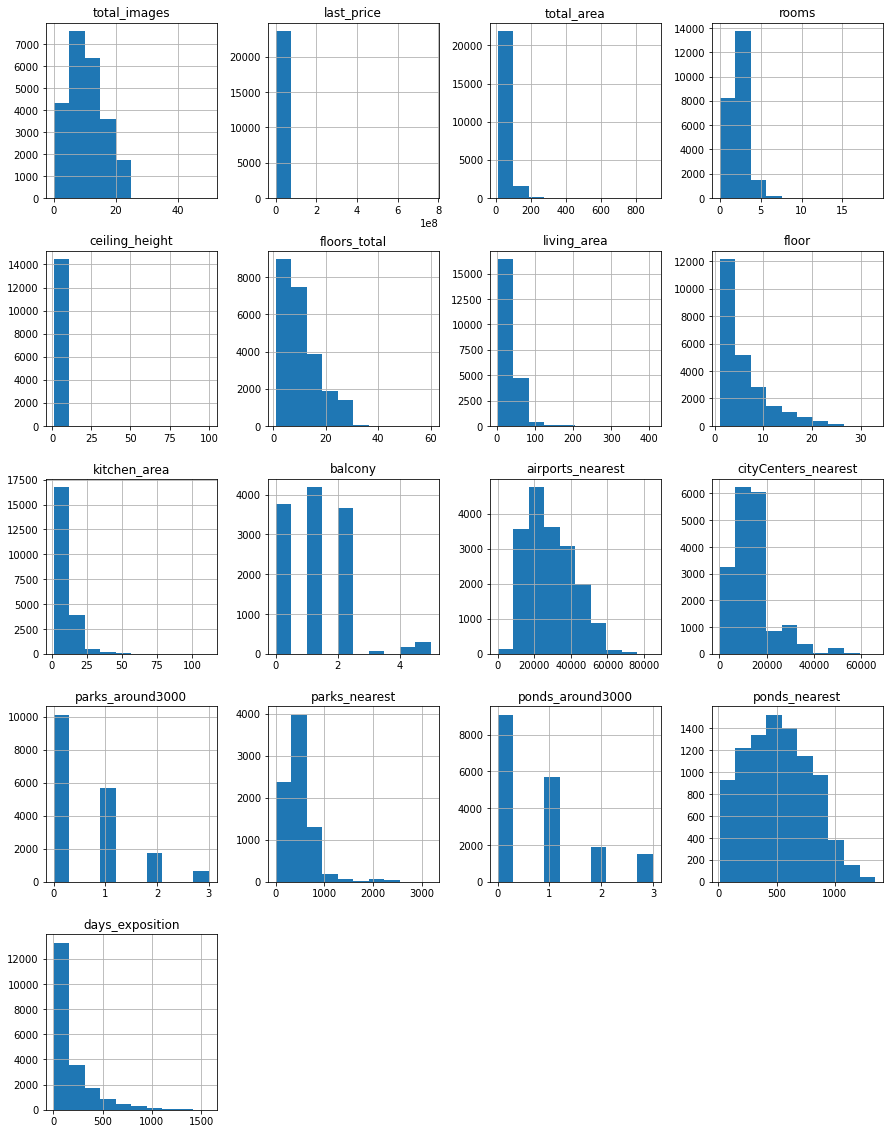

In [6]:
data.hist(figsize=(15, 20));

## Вывод

В полученных данных были обнаружены признаки с большим количеством пропуском и нарушением в стилистике именования столбцов. Также, наличие большого разброса в некоторых признаках может указывать на высокую дисперсию и возможные выбросы.

# Предобработка данных

## Избавление от нарушений стилистики именования столбцов и приведение к общему виду

In [7]:
data = data.rename(columns={'cityCenters_nearest': 'city_center_nearest',
                            'studio': 'is_studio',
                            'open_plan': 'is_open_plan',
                            'parks_around3000': 'parks_around_3000m',
                            'ponds_around3000': 'ponds_around_3000m',
                            }
)
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around_3000m', 'parks_nearest', 'ponds_around_3000m',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

## Выведем количество пропущенных значений для каждого столбца.

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
is_studio                   0
is_open_plan                0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_center_nearest      5519
parks_around_3000m       5518
parks_nearest           15620
ponds_around_3000m       5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Самое большое количество пропусков в столбце is_apartment. Проверим, какие значения там храняться и обработаем пропуски.

In [9]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [10]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Мы рассматриваем объявления о продаже квартир, апартаменты не являются жилой недвижимостью. Скорее всего, пользователи могли не указывать о том, что продают квартиру, т.к. это основной пункт в объявлении. <br><br><br>
## Заменим все значения NaN на False и изменим тип данных в столбце на целочисленный, т.к. есть всего две категории: 1 - апартаменты, 0 - не апартаменты и для работы с графиками.

In [11]:
data['is_apartment'] = (data['is_apartment'].fillna(False)).astype('int64')
print(data['is_apartment'].value_counts())
print(data['is_apartment'].dtype)

0    23649
1       50
Name: is_apartment, dtype: int64
int64


## Проверим значения в balcony.

In [12]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Скорее всего NaN означает отсутствие балкона. <br><br>


### Заменим NaN на 0 и изменим тип данных на int64, т.к. количество балконов является целочисленным значением.

In [13]:
data['balcony'] = (data['balcony'].fillna(0)).astype('int64')
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

## Избавление от неявных дубликатов.

In [14]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'поселок станции', 'городской поселок', 'поселок при железнодорожной станции', 'коттеджный поселок'], 'поселок', regex=True)
) 


### Посчитаем долю пропусков от общего числа

In [16]:
round(data['locality_name'].isna().sum() / 23699 * 100, 2)

0.21

Доля пропусков составляет 0.21%. 
### Удаление пропусков

In [17]:
data = data.dropna(subset=['locality_name'])
# Проверим количество пропусков
data['locality_name'].isna().sum()

0

## Выведем строки с недвижимостью, высота потолков которых превышает 6 метров

In [18]:
data[data['ceiling_height'] > 6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,0,False,False,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,0,False,False,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,0,False,False,7.3,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,0,False,False,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,0,False,True,NaN,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,1,False,False,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,0,False,False,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,0,False,False,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,0,False,False,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,0,False,False,8.3,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


Видно, что данные заполненны некорректно. Скорее всего была ошибка при заполнении и неправильно поставлена точка. Также, есть несколько строк со значением 8.0 и 100. В этих строках некоторые данные тоже заполнены некорректно. Удалим эти строки, а остальные обработаем.


### Исправим неккоректные значения

In [19]:
# Заполним пропуски медианым значением в зависимости от этажности здания
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('median'))
# Разделяем значения от 8 до 100 на 10
data.loc[(data['ceiling_height'] >= 8.3) & (data['ceiling_height'] <= 100), 'ceiling_height'] /= 10
# Удаляем всё, что >= 8
data = data[data['ceiling_height'] < 8]

Минимальная высота потолков в квартире должна составлять 2.4м (СНиП 31-01-2003). 

### Выясним количество недвижимости с потолками ниже 2.4м.

In [20]:
data[data['ceiling_height'] < 2.4]['ceiling_height'].count()

27

### Удалим строки с неккоректными значениями

In [21]:
data = data[data['ceiling_height'] >= 2.4]

В квартирах с разной общей площадью доли жилой и площадью кухни отличаются. Например, в студиях кухня и жилая площадь могут быть объединены. В больших квартирах кухня занимает меньший процент, а жилая — больше. Учитывая зависимость этих параметров от общей площади, найдем медианную долю living_area и kitchen_area.

## Посчитаем долю жилой и кухонной площади относительно общей и заполним пропуски

In [22]:
# Считаем медианное значение доли жилой зоны
living_median_ratio = (data['living_area'] / data['total_area']).median()
# Заполняем пропуски
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] * living_median_ratio

# Считаем медианное значение доли кухонной зоны
kitchen_median_ratio = (data['kitchen_area'] / data['total_area']).median()
# Заполняем пропуски
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['total_area'] * kitchen_median_ratio

**Проверим количество пропусков на данный момент**

In [23]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area                 0
floor                       0
is_apartment                0
is_studio                   0
is_open_plan                0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5509
city_center_nearest      5486
parks_around_3000m       5485
parks_nearest           15518
ponds_around_3000m       5485
ponds_nearest           14510
days_exposition          3170
dtype: int64

В столбцах: airports_nearest, city_center_nearest, parks_around_3000m, parks_nearest, ponds_around_3000m, ponds_nearest, days_exposition       
данные собраны автоматически. Пропуски в days_exposition означают, что объявление еще актуально. В остальных признаках лучше оставить NaN, потому что пропуски в этом случае могут нести смысловую нагрузку (отсутствие объектов рядом). Заполнение медианой или средним значением приведет к потере полезной информации.

Также, осталось 9 пропусков в floors_total. Они составляют менее 0.1% от общего числа. Это крайне малое значение и можно пренебречь этими данными.

## Удалим пропуски в floors_total

In [24]:
data = data.dropna(subset=['floors_total'])

## Изменим типы данных в некоторых столбцах

In [25]:
data = data.astype({'is_studio': 'int64', 'is_open_plan': 'int64', 'floors_total': 'int64'})

Мы изменили в is_studio и is_open_plan тип данных с булевого на целочисленный для работы с графиками, а в floors_total на целочисленный, так как количество этажей не может быть дробным числом.

### Переведем first_day_exposition в формат datetime

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

## Обработаем аномалии в total_area

Согласно СНиП 31-01-2003 минимальная площадь жилой комнаты в однокомнатной квартире — 14 м², также допускается проектировать кухни или кухни-ниши площадью не менее 5 м². Соответственно, если учитывать площадь сан-узла и коридоров, то общая площадь квартиры не должна быть меньше 19 м² + 10% от общей площади. 
Данные требования учитываются на этапах строительства, но жильцы могут сделать перепланировку. Поэтому мы отбросим те квартиры, где жилая и площадь кухни превышает общую + 10%.
Остальные выбросы обработаем на этапе анализа.

### Выведем количество квартир, площадь которых менее 19 м² и у которых площадь кухни и жалая больше общей и удалим их

In [27]:
# Фильтр для поиска некорректных значений
invalid_flats = data[
    (data['is_apartment'] == False) & 
    (data['total_area'] < 19) | 
    (data['living_area'] + data['kitchen_area'] > data['total_area'] * 0.9)  # Учитываем 10% на коридоры и санузел
]

# Вывод количества найденных строк
print(f"Найдено {invalid_flats.shape[0]} некорректных квартир")

# Удаление таких строк
data = data.drop(invalid_flats.index).reset_index(drop=True)

Найдено 648 некорректных квартир


Самое высокое жилое здание в Санкт-Петербурге имеет 37 этажей. Если есть объявления, в которых указано, что это квартира и она находится выше 37 этажа, то, скорее всего, это апартаменты, которые продается под видом жилой недвижимости. 

## Проверим, есть ли квартиры выше 37 этажа и удалим, если такие имеются

In [28]:
data[data['floor'] > 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition


**Вывод**


Были найдены и изучены пропущенные значения в столбцах. Заполнены пропущенные значения там, где это возможно. Приведены названия к общей стилистике. Преобразованны типы данных в некоторых столбцах и обработаны аномалии.

# Добавление в таблицу новых столбцов

## Добавим цену за один квадратный метр

In [29]:
data['square_meter_price'] = round(data['last_price'] / data['total_area'], 2)

## Добавим день публикации объявления, месяц и год

In [30]:
# День недели
data['weekday'] = pd.to_datetime(data['first_day_exposition']).dt.weekday
# Месяц
data['month'] = pd.to_datetime(data['first_day_exposition']).dt.month
# Год
data['year'] = pd.to_datetime(data['first_day_exposition']).dt.year

## Добавим столбец с типом этажа

In [31]:
def floor_type(row):
    """Функция возвращает тип этажа квартиры"""
    if row["floor"] == 1:
        return "первый"
    elif row["floor"] == row["floors_total"]:
        return "последний"
    else:
        return "другой"

data["floor_type"] = data.apply(floor_type, axis=1)

## Добавим расстояние до центра города в км

In [32]:
data['distance_to_center'] = (data['city_center_nearest'] / 1000).round()

# Исследовательский анализ данных

## Определим функцию для построения гистограммы по определенному параметру и вывода основной статистики

In [33]:
def show_hist(data, column, bins=30):
    """
    Строит гистограмму и boxplot для указанного столбца DataFrame, 
    выводит основные статистические параметры, отмечает 99-й перцентиль,
    а также показывает количество значений, превышающих 99-й перцентиль, и их долю.

    params:
    data (DataFrame): Исходный датафрейм.
    column (str): Название столбца для анализа.
    bins (int, optional): Количество бинов гистограммы. По умолчанию 30.

    return:
    None
    """
    # Вычисление статистики
    percentile_99 = data[column].quantile(0.99)
    count_above_99 = data[data[column] > percentile_99][column].count()
    total_count = data[column].count()
    proportion_above_99 = count_above_99 / total_count
    
    print(f"\nСтатистика для '{column}':")
    print(f"Количество значений: {total_count}")
    print(f"Минимум: {data[column].min()}")
    print(f"Максимум: {data[column].max()}")
    print(f"Среднее: {data[column].mean():.2f}")
    print(f"Медиана: {data[column].median():.2f}")
    print(f"Стандартное отклонение: {data[column].std():.2f}")
    print(f"99-й перцентиль: {percentile_99:.2f}")
    print(f"Количество значений выше 99-го перцентиля: {count_above_99}")
    print(f"Доля значений выше 99-го перцентиля: {proportion_above_99:.2%}")

    # Создаём фигуру с 2 графиками: гистограмма + boxplot
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

    # Гистограмма с линией 99-го перцентиля
    sns.histplot(data[column], bins=bins, kde=True, color="blue", alpha=0.7, ax=axes[0])
    axes[0].axvline(percentile_99, color='red', linestyle='dashed', linewidth=2, label="99-й перцентиль")
    axes[0].legend()
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Частота")
    axes[0].set_title(f"Гистограмма для '{column}'")
    axes[0].grid(True)

    # Boxplot
    sns.boxplot(x=data[column], ax=axes[1], color="lightblue")
    axes[1].axvline(percentile_99, color='red', linestyle='dashed', linewidth=2)
    axes[1].set_xlabel(column)
    axes[1].set_title("Boxplot")

    plt.tight_layout()
    plt.show()


## Гистограмма общей площади


Статистика для 'total_area':
Количество значений: 22885
Минимум: 19.0
Максимум: 900.0
Среднее: 60.34
Медиана: 52.00
Стандартное отклонение: 35.50
99-й перцентиль: 196.00
Количество значений выше 99-го перцентиля: 228
Доля значений выше 99-го перцентиля: 1.00%


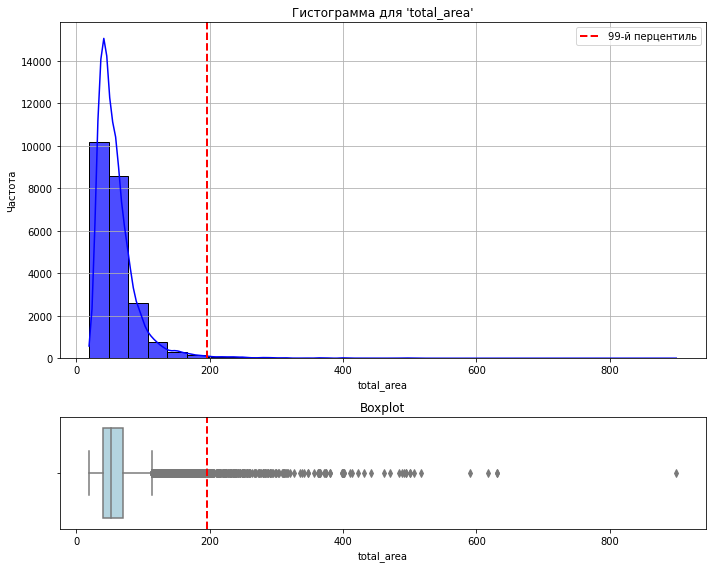

In [34]:
show_hist(data, 'total_area')

Заметен длинный хвост уходящий вправо, это означает, что есть некоторое количество недвижимости с площадью выше 200 м². 
Квартиры, с площадью более 200 м² являются элитыным жильем и их цена может быть определена наличием других параметров (вертолетная площадка, бассейн и т.д.) Будем работать с более массовым сегментом рынка, где сосредоточена основная масса объявлений. 

## Создадим новую таблицу с объявлениями, где общая площадь не превышает 200 м²

In [35]:
# Фильтруем данные
standart_df = data[data['total_area'] <= 200]

## Гисторгамма жилой площади


Статистика для 'living_area':
Количество значений: 22354
Минимум: 11.420454545454547
Максимум: 150.8
Среднее: 33.36
Медиана: 30.00
Стандартное отклонение: 16.91
99-й перцентиль: 95.00
Количество значений выше 99-го перцентиля: 222
Доля значений выше 99-го перцентиля: 0.99%


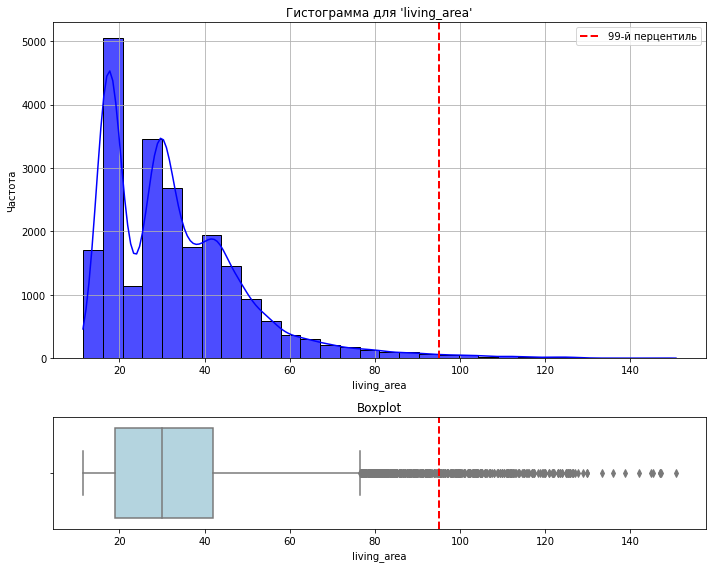

In [36]:
standart_df = standart_df[(standart_df['is_apartment'] == 1) | ((standart_df['living_area'] >= 14) & (standart_df['is_apartment'] == 0))]
# Выводим гистограмму 
show_hist(standart_df, 'living_area')

Длинный хвост на гистограмме указывает на то, что у квартир с большей общей площадью заметно больше жилая площадь. 

## Гистограмма площади кухни


Статистика для 'kitchen_area':
Количество значений: 22354
Минимум: 1.3
Максимум: 93.2
Среднее: 10.16
Медиана: 9.00
Стандартное отклонение: 5.05
99-й перцентиль: 30.04
Количество значений выше 99-го перцентиля: 224
Доля значений выше 99-го перцентиля: 1.00%


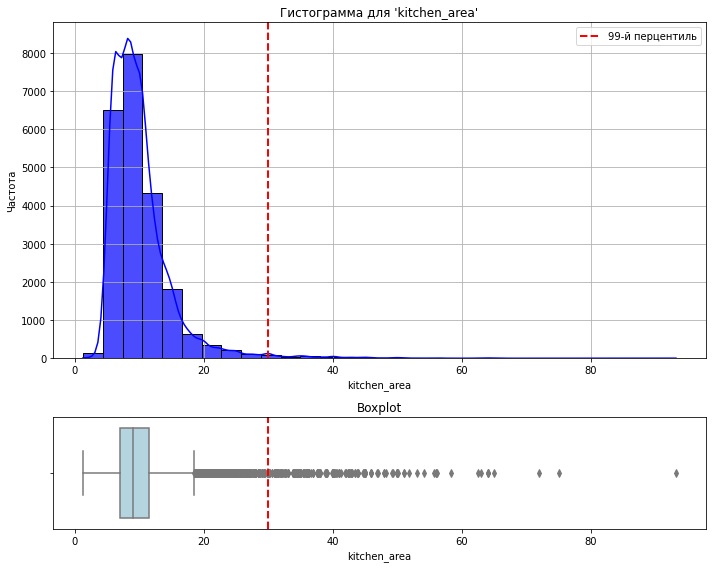

In [37]:
show_hist(standart_df, 'kitchen_area')

Среднее и медиана близки, большая часть квартир имеет площадь кухни до 20 $м^{2}$

## Гистограмма стоимости недвижимости.


Статистика для 'last_price':
Количество значений: 22354
Минимум: 0.01219
Максимум: 330.0
Среднее: 6.04
Медиана: 4.62
Стандартное отклонение: 6.24
99-й перцентиль: 27.59
Количество значений выше 99-го перцентиля: 224
Доля значений выше 99-го перцентиля: 1.00%


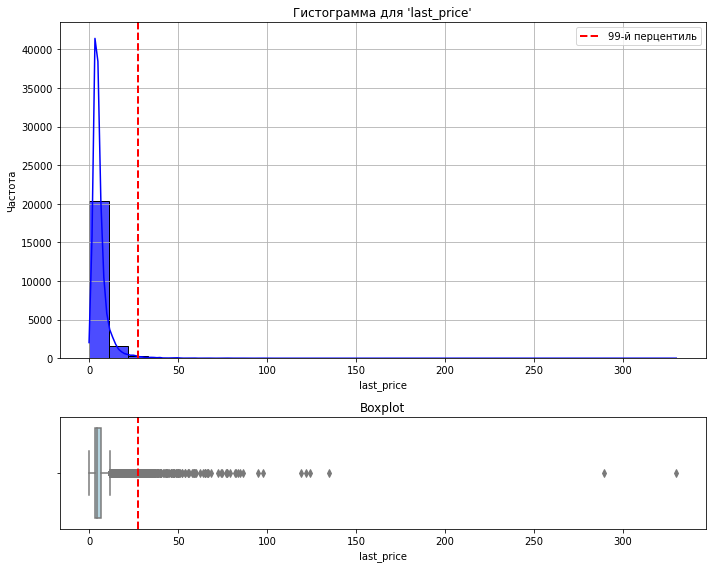

In [38]:
# Разделим значения в столбце last_price на 1000000 для лучшей читаемости
standart_df['last_price'] = standart_df['last_price'] / 1000000 
show_hist(standart_df, 'last_price')

На гистограмме есть 6 экстремальных выбросов. Чтобы сохранить данные о дорогих объектах, но без аномалий, удалим эти значения.

### Удаляем 6 самых дорогих объектов

In [39]:
# Сохраняем индексы 5 самых дорогих объектов
maximum_price = standart_df.nlargest(6, 'last_price').index
# Удаляем эти объявления
standart_df = standart_df.drop(maximum_price)

## Гистограмма количества комнат.


Статистика для 'rooms':
Количество значений: 22348
Минимум: 0
Максимум: 11
Среднее: 2.05
Медиана: 2.00
Стандартное отклонение: 0.99
99-й перцентиль: 5.00
Количество значений выше 99-го перцентиля: 78
Доля значений выше 99-го перцентиля: 0.35%


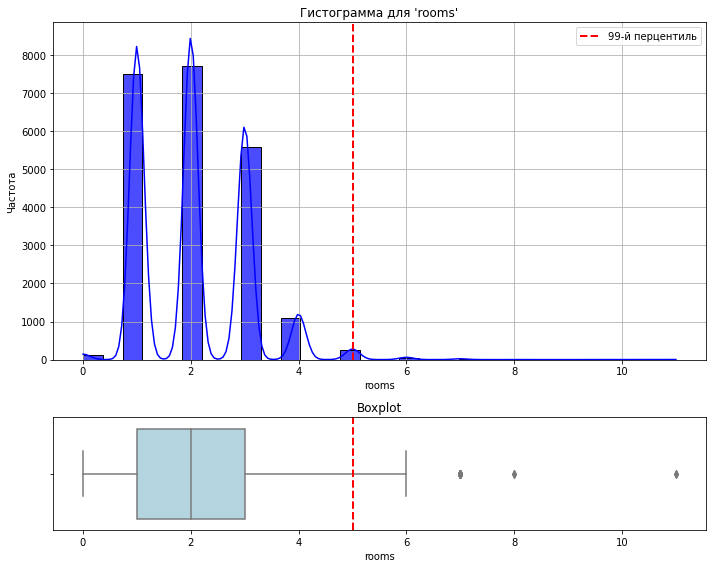

In [40]:
show_hist(standart_df, 'rooms')

Есть несколько объектов с количеством комнат больше 5. Это свойственно для элитной недвижимости и квартир с большой площадью. 
Также, есть несколько объектов, где количество комнат 0. Заменим эти значения на 1.

### Заменим количество комнат на 1 в тех объектах, где оно равно 0.

In [41]:
standart_df.loc[standart_df['rooms'] == 0, 'rooms'] = 1

##  Гистограмма высоты потолков.


Статистика для 'ceiling_height':
Количество значений: 22348
Минимум: 2.4
Максимум: 5.5
Среднее: 2.70
Медиана: 2.65
Стандартное отклонение: 0.22
99-й перцентиль: 3.50
Количество значений выше 99-го перцентиля: 211
Доля значений выше 99-го перцентиля: 0.94%


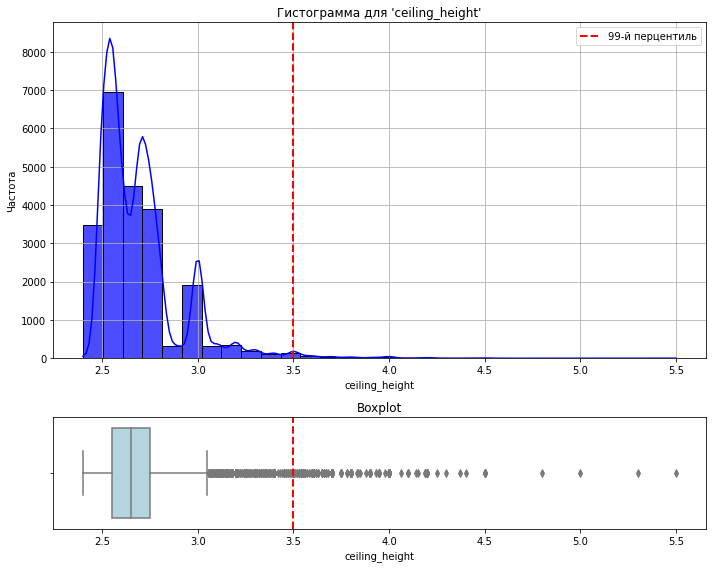

In [42]:
show_hist(standart_df, 'ceiling_height')

Большинство объектов имеют высоту потолков в диапазоне 2.4-3.5 метров. Это соответствует типичным значением для жилых помещений.

## Гистограмма типа этажа.

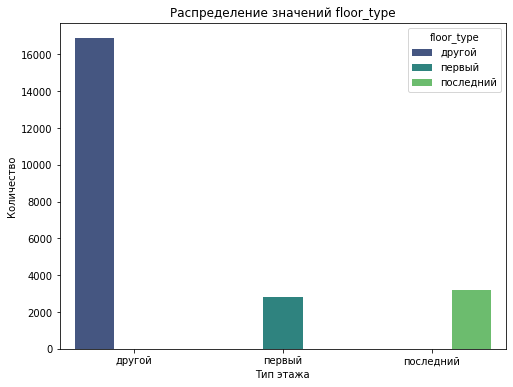

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='floor_type', palette='viridis', hue='floor_type')
plt.title('Распределение значений floor_type')
plt.xlabel('Тип этажа')
plt.ylabel('Количество')
plt.show()

Меньше всего продается квартир на первом этаже. 

## Гистограмма общего количества этажей в доме.


Статистика для 'floors_total':
Количество значений: 22348
Минимум: 1
Максимум: 60
Среднее: 10.69
Медиана: 9.00
Стандартное отклонение: 6.55
99-й перцентиль: 26.00
Количество значений выше 99-го перцентиля: 198
Доля значений выше 99-го перцентиля: 0.89%


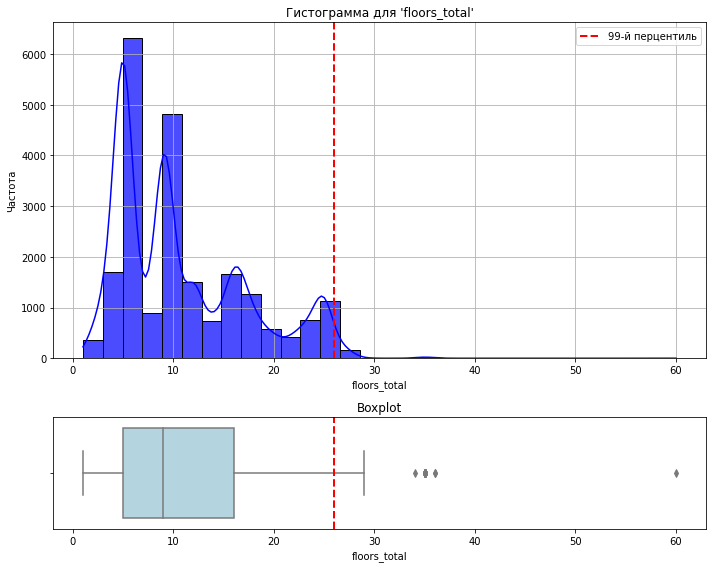

In [44]:
show_hist(standart_df, 'floors_total')

На гистограмме есть один экстремальный выброс. Проверим это объявление.

### Выведем строку с максимальным значением floors_total.

In [45]:
standart_df[standart_df['floors_total'] > 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_type,distance_to_center
2190,12,3.8,45.5,2018-06-28,2,2.88,60,27.4,4,0,0,0,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,83516.48,3,6,2018,другой,49.0


Скорее всего была допущена ошибка при заполнении объявления и добавлен лишний 0. 

### Изменим значение floors_total с 60 на 6.

In [46]:
standart_df.loc[standart_df['floors_total'] == 60, 'floors_total'] = 6

## Гистограмма расстояния до центра города в метрах


Статистика для 'distance_to_center':
Количество значений: 17148
Минимум: 0.0
Максимум: 66.0
Среднее: 14.33
Медиана: 13.00
Стандартное отклонение: 8.62
99-й перцентиль: 50.00
Количество значений выше 99-го перцентиля: 149
Доля значений выше 99-го перцентиля: 0.87%


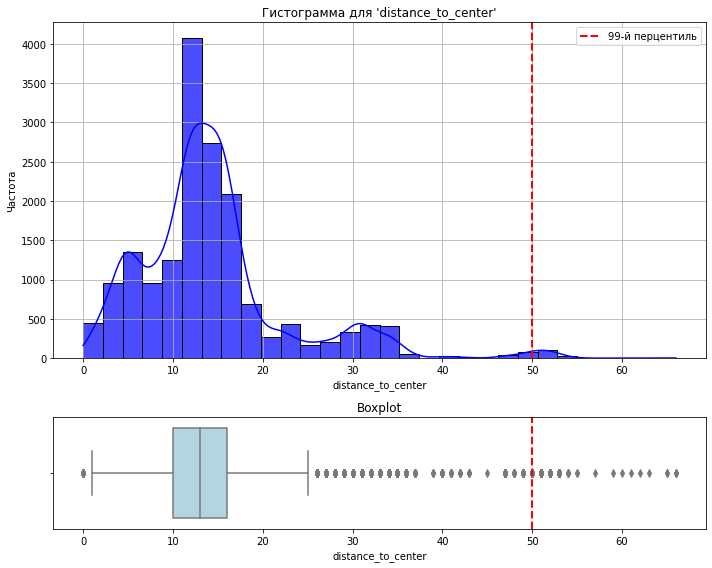

In [47]:
show_hist(standart_df, 'distance_to_center')

На гистограмме минимальное значение равно 0. Т.к. мы округляли до расстояние до центра города до ближайшего целого числа, то это означает, что эти объекты находятся на расстоянии менее 1 км до центра. Объекты, расположенные более 50 км от центра оставим для общего анализа.

## Гистограмма расстояния до ближайшего парка


Статистика для 'parks_nearest':
Количество значений: 7560
Минимум: 1.0
Максимум: 3190.0
Среднее: 491.95
Медиана: 456.00
Стандартное отклонение: 340.45
99-й перцентиль: 2102.00
Количество значений выше 99-го перцентиля: 70
Доля значений выше 99-го перцентиля: 0.93%


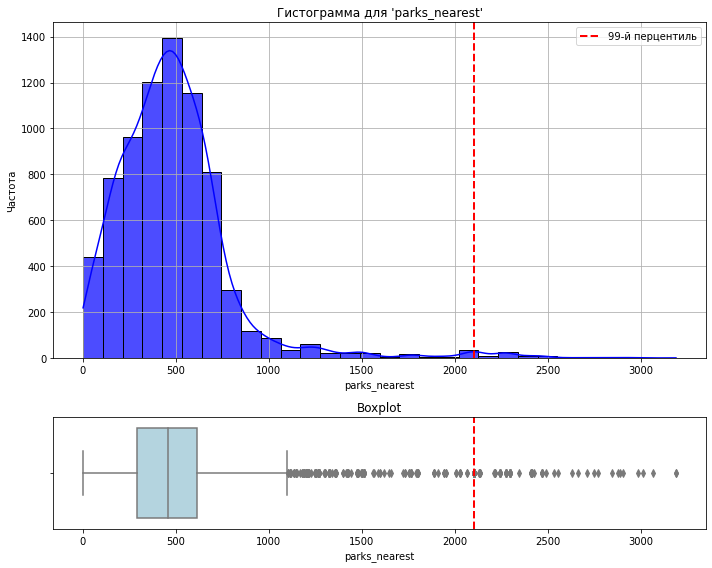

In [48]:
show_hist(standart_df, 'parks_nearest')

Т.к. данные по расстоянию были собраны автоматически, мы не видим полной картины по всем объектам. Из имеющихся данных мы видим, что большинство квартир находится в радиусе 1 км от парка. Нас интересуют только парки, расположенные в радиусе 3 км, остальными объектами можно пренебречь.

### Удалим строки, где расстояние до парка превышает 3000 м.

In [49]:
standart_df = standart_df[(standart_df['parks_nearest'] <= 3000) | (standart_df['parks_nearest'].isna())]

## Скорость продажи квартиры

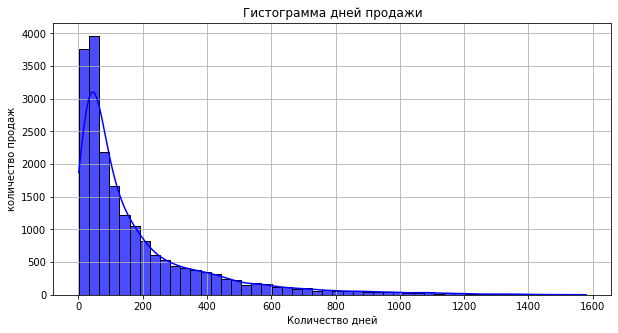

Среднее время продажи: 181 дней
Медианное время продажи: 96 дней


In [50]:
# Построим гистограмму
plt.figure(figsize=(10, 5))
sns.histplot(data['days_exposition'], bins=50, kde=True, color='blue', alpha=0.7)
plt.xlabel('Количество дней')
plt.ylabel('количество продаж')
plt.title('Гистограмма дней продажи')
plt.grid(True)
plt.show()
# Посчитаем среднее и медиану
print(f"Среднее время продажи: {int(data['days_exposition'].mean().round())} дней")
print(f"Медианное время продажи: {int(data['days_exposition'].median())} дней")

Большинство квартир продается достаточно быстро, но медиана значительно отличается от среднего. Можно считать, что быстрая продажа - менее 96 дней, долгая - более 181 дня.

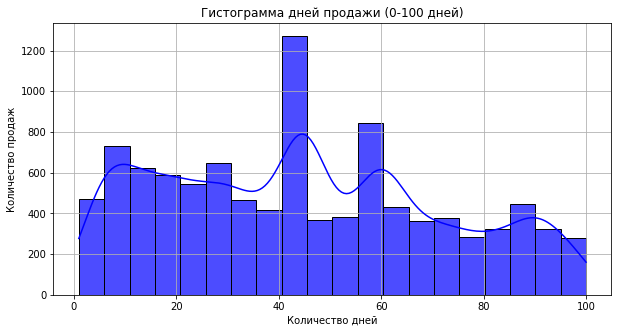

In [51]:
plt.figure(figsize=(10, 5))

# Фильтруем данные для диапазона 0-100 дней
sns.histplot(data[data['days_exposition'] <= 100]['days_exposition'], bins=20, kde=True, color='blue', alpha=0.7)

plt.xlabel('Количество дней')
plt.ylabel('Количество продаж')
plt.title('Гистограмма дней продажи (0-100 дней)')
plt.grid(True)
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
Я предполагаю, что это может быть связано со сроком размещения объявления. Т.е., при повторном размещении или, когда срок размещения подходил к концу, указывали цену ниже. Или это может быть рассмотрение ипотечной заявки. 
<br>
</div>

In [52]:
filtered_data = data[(data['days_exposition'].between(40, 45)) | (data['days_exposition'].between(55, 60))]

filtered_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_type,distance_to_center
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.400000,5,0,0,0,9.100000,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
22,20,5000000.0,58.0,2017-04-24,2,2.75,25,30.000000,15,0,0,0,11.000000,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,86206.90,0,4,2017,другой,NaN
53,6,3320000.0,36.5,2017-04-14,1,2.75,24,14.000000,6,0,0,0,12.000000,0,Санкт-Петербург,33331.0,14495.0,0.0,NaN,0.0,NaN,44.0,90958.90,4,4,2017,другой,14.0
81,3,4500000.0,80.5,2018-01-15,3,2.75,25,45.738636,16,0,0,0,13.874797,0,поселок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0,55900.62,0,1,2018,другой,18.0
104,12,4900000.0,32.0,2018-01-07,1,2.75,25,15.000000,5,0,0,0,9.000000,0,Санкт-Петербург,52480.0,15598.0,0.0,NaN,1.0,464.0,60.0,153125.00,6,1,2018,другой,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22830,14,5950000.0,80.3,2018-07-03,3,2.70,12,45.625000,5,0,0,0,13.840325,0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0,74097.14,1,7,2018,другой,34.0
22845,2,5990000.0,64.0,2017-04-21,2,2.75,19,31.000000,16,0,0,0,11.000000,0,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,40.0,93593.75,4,4,2017,другой,14.0
22850,12,6400000.0,88.0,2018-01-12,4,2.55,10,50.000000,1,0,0,0,15.167480,0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0,72727.27,4,1,2018,первый,14.0
22860,9,3100000.0,23.0,2018-03-19,1,2.80,9,12.600000,1,0,0,0,5.000000,2,Санкт-Петербург,11813.0,11881.0,1.0,262.0,1.0,442.0,41.0,134782.61,0,3,2018,первый,12.0


**Напишем функцию, которая будет выводить зависимость цены от указанного параметра**

In [53]:
def plot_price_dependence(data, parameter, bins=10, diapason=True, corr=True):
    """
    Функция строит график зависимости цены от указанного параметра и выводит корреляцию.

    params:
    data: pandas DataFrame, данные для анализа
    parameter: строка, имя столбца для анализа
    bins: количество диапазонов для разбивки параметра (по умолчанию 10)
    diapason: True - если необходимо разбить параметр на диапазоны
    corr: подсчет корреляции. По умолчанию True
    """
    # Оставим только нужные столбцы для анализа
    data_filtered = data[['last_price', parameter]].dropna()
    

    # Разбиваем на диапазоны (например, 10)
    if diapason:
        data_filtered['parameter_range'] = pd.cut(data_filtered[parameter], bins=bins)
        # Строим сводную таблицу: средняя цена для каждого диапазона параметра
        pivot_table = data_filtered.pivot_table(index='parameter_range', values='last_price', aggfunc='mean', observed=False)
    else:
        pivot_table = data_filtered.pivot_table(index=parameter, values='last_price', aggfunc='mean', observed=False)
    
    # Построение графика
    pivot_table.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Средняя цена в зависимости от {parameter}')
    plt.xlabel(f'Диапазоны {parameter}')
    plt.ylabel('Средняя цена (руб.)')
    plt.xticks(rotation=45)
    plt.show()

    if corr:
        # Считаем корреляцию
        correlation = data_filtered['last_price'].corr(data_filtered[parameter])
        
        print(f"Корреляция между {parameter} и ценой: {correlation:.4f}")

## Зависимость цены от общей площади

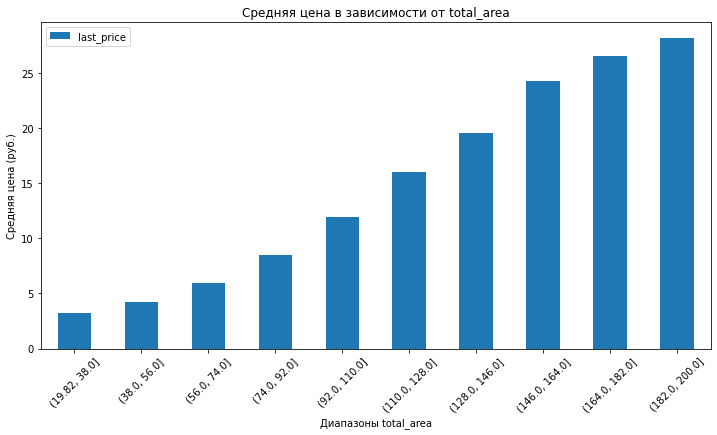

Корреляция между total_area и ценой: 0.7346


In [54]:
plot_price_dependence(standart_df, 'total_area')

На гистограмме мы видим, что цена растет в зависимости от общей площади недвижимости

## Зависимость цены от жилой площади

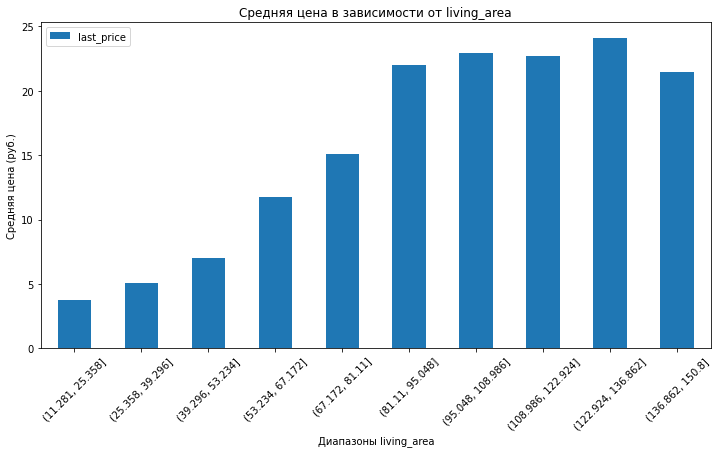

Корреляция между living_area и ценой: 0.6321


In [55]:
plot_price_dependence(standart_df, 'living_area')

Средняя цена на недвижимость растет, в зависимости от жилой площади объекта. 

## Зависимость цены от площади кухни

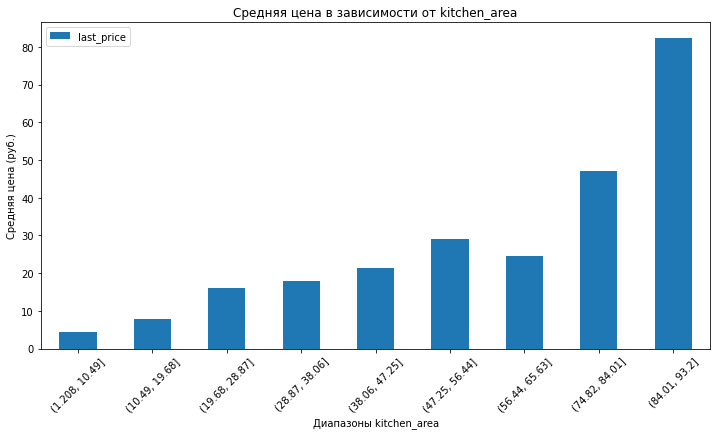

Корреляция между kitchen_area и ценой: 0.5860


In [56]:
plot_price_dependence(standart_df, 'kitchen_area')

На данной гистограмме также видно зависимость цены от площади кухни

## Зависимость цены от количества комнат

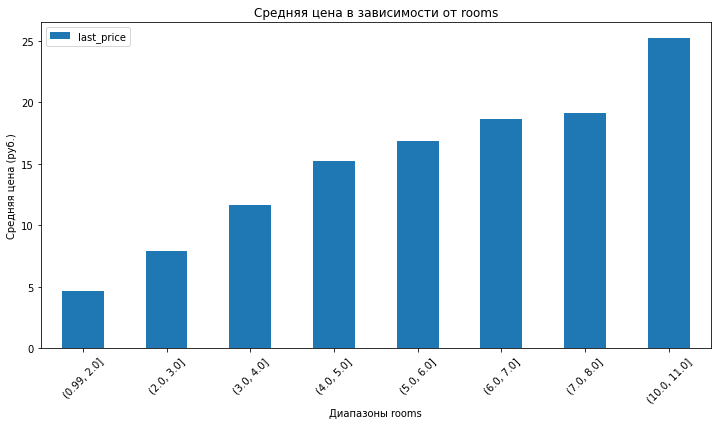

Корреляция между rooms и ценой: 0.4363


In [57]:
plot_price_dependence(standart_df, 'rooms')

Количество комнат также влияет на цену недвижимости.

## Зависимость цены от типа этажа

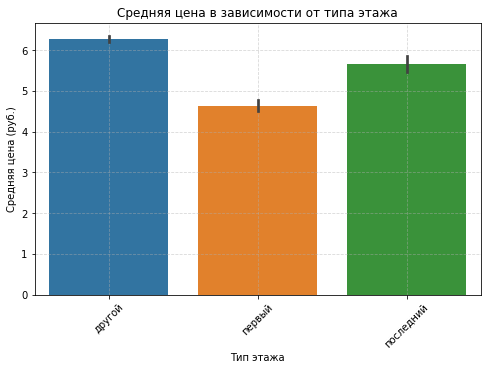

In [58]:
plt.figure(figsize=(8, 5))
sns.barplot(x='floor_type', y='last_price', data=standart_df, estimator=lambda x: sum(x) / len(x))
plt.title('Средняя цена в зависимости от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя цена (руб.)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

Как видно, на первом этаже квартиры заметно дешевле, чем на остальных.

## Зависимость цены от даты размещения (день недели, месяц, год)

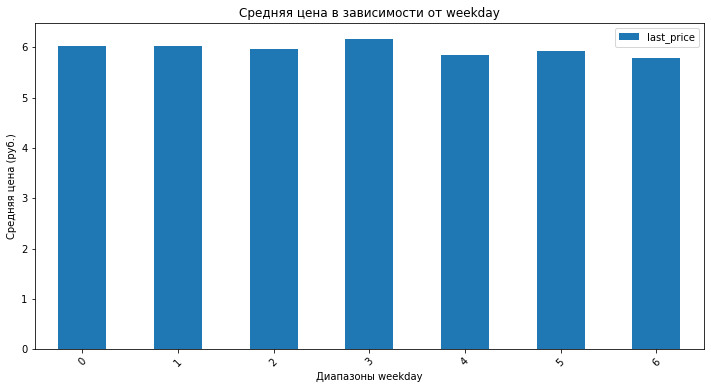

In [59]:
plot_price_dependence(standart_df, 'weekday', diapason=False, corr=False)

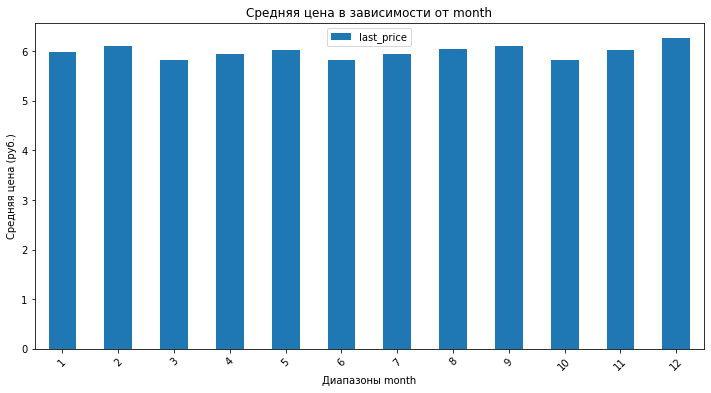

In [60]:
plot_price_dependence(standart_df, 'month', diapason=False, corr=False)

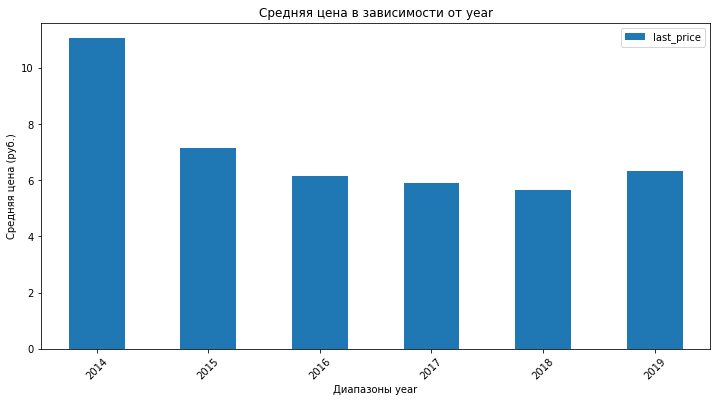

In [61]:
plot_price_dependence(standart_df, 'year', diapason=False, corr=False)

Исходя из данных графиков мы видим, что цена не зависит от дня недели и месяца размещения объявления. В период с 2014 года по 2018 год цена на недвижимость снижалась и снова начала расти с 2019 года.

## Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

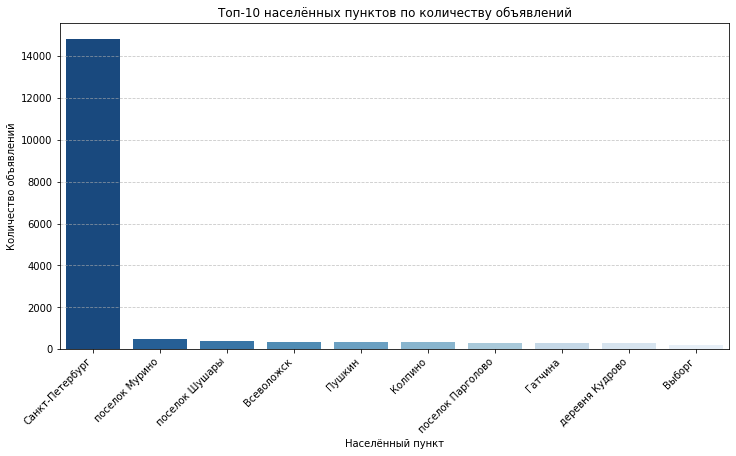

In [62]:
# Создаём сводную таблицу
largest_ads = standart_df.pivot_table(
    index='locality_name', 
    values=['square_meter_price', 'last_price'], 
    aggfunc={'square_meter_price': 'mean', 'last_price': 'count'}
)

# Переименовываем столбец с количеством объявлений
largest_ads = largest_ads.rename(columns={'last_price': 'count_ads'})

# Сортируем и выбираем топ-10 населённых пунктов по количеству объявлений
largest_ads = largest_ads.sort_values('count_ads', ascending=False).head(10)

# Строим барплот
plt.figure(figsize=(12, 6))
sns.barplot(data=largest_ads.reset_index(), x='locality_name', y='count_ads', palette='Blues_r')

# Оформляем график
plt.xticks(rotation=45, ha='right')
plt.xlabel("Населённый пункт")
plt.ylabel("Количество объявлений")
plt.title("Топ-10 населённых пунктов по количеству объявлений")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Самая большое количество объявлений в Санкт-Петербурге

## Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [63]:
high_price = largest_ads['square_meter_price'].idxmax()
low_price = largest_ads['square_meter_price'].idxmin()

print(f'Самая высокая средняя цена за квадратный метр в {high_price}: {largest_ads.loc[high_price, "square_meter_price"]:.2f} руб.')
print(f'Самая низкая средняя цена за квадратный метр в {low_price}: {largest_ads.loc[low_price, "square_meter_price"]:.2f} руб.')

Самая высокая средняя цена за квадратный метр в Санкт-Петербург: 112520.66 руб.
Самая низкая средняя цена за квадратный метр в Выборг: 58178.61 руб.


## Выделим квартиры в Санкт-Петербурге и вычислим их среднюю стоимость на разном удалении от центра.

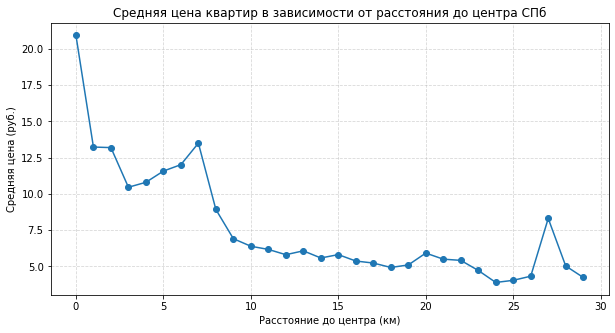

In [64]:
# Посчитаем среднюю цену для каждого километра
spb_flats = standart_df[standart_df['locality_name'] == 'Санкт-Петербург'].pivot_table(index='distance_to_center', values='last_price', aggfunc='mean')
# Построим график
plt.figure(figsize=(10, 5))
plt.plot(spb_flats.index, spb_flats['last_price'], marker='o', linestyle='-')
plt.title('Средняя цена квартир в зависимости от расстояния до центра СПб')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена (руб.)')
plt.grid(True, linestyle='--', alpha=0.5)

Самая дорогая недвижимость в Санкт-Петербурге находится в радиусе 7 км от центра города, далее - цена начинает снижаться. Также, есть пики в 20 и 27 км от центра. Возможно, эти квартиры находятся в новых районах города и домах повышенной комфортности. 

# Вывод

Мы провели исследовательский анализ данных, исследовали параметры, обработали редкие и выбивающиеся значения. Изучили, как быстро продавались квартиры и определили факторы, которые больше всего влияют на общую (полную) стоимость объекта. Построили графики зависимости цены, посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделили населённые пункты с самой высокой и низкой стоимостью квадратного метра. Вычислили среднюю стоимость недвижимости в Санкт-Петербурге на разном удалении от центра.

# Общий вывод

Мы изучили и проанализировали датасет с архивом объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

Из проведенного анализа было установленно, что факторами, влияющими на цену недвижимости в Санкт-Петербурге и соседних населённых пунктах являются:
1. Общая площадь
2. Жилая площадь
3. Площадь кухни
4. Количество комнат
5. Тип этажа

Изучив недвижимость, которая находится непостредственно в Санкт-Петербурге, было установленно, что цена зависит не только от вышеперечисленных факторов, но и от расположения относительно центра города. Чем ближе к центру, тем выше цена.